In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearnex import patch_sklearn 
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# 1. Load data

In [3]:
origin_data = pd.read_csv("data/credit_score_dataset.csv")

In [4]:
origin_data.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,88592,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,NaN,NaN,434,6260,NaN,749,4384,NaN,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,NaN,NaN,3,Not Specified,NaN,19,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,NaN,NaN,14386,1408,NaN,5327,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [5]:
origin_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# 2. Data processing

In [6]:
origin_data.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,88592,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,NaN,NaN,434,6260,NaN,749,4384,NaN,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,NaN,NaN,3,Not Specified,NaN,19,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,NaN,NaN,14386,1408,NaN,5327,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


# 3. Feature engineering

## 3.1 Features

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

def list_to_one_hot_encoding(df, column_name):
    mlb = MultiLabelBinarizer()
    df = df.join(pd.DataFrame(mlb.fit_transform(df[column_name]),
                              columns=mlb.classes_,
                              index=df.index))
    return df

In [8]:
def convert_credit_history_age(val):
    if isinstance(val, str):
        val_list = val.split()
        val_list = [x.replace("_", "") for x in val_list]
        picked_val = int(val_list[0])
        return picked_val
    else:
        return val
    
    
def replace_underscore(val, min_val=-np.inf):
    if isinstance(val, str):
        check_val = val.replace("_", "").strip()
        if check_val == "":
            return np.nan
        
        check_val = float(check_val)
        if check_val < min_val:
            check_val = np.nan
        
        return check_val
    else:
        return val
    

In [9]:
origin_data['Credit_History_Age'].apply(convert_credit_history_age)

0        22.0
1         NaN
2        22.0
3        22.0
4        22.0
         ... 
99995    31.0
99996    31.0
99997    31.0
99998    31.0
99999    31.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [10]:
import re

def find_number(val):
    if isinstance(val, str):
        num = re.findall(r'[0-9.]+',val)
        return " ".join(num)
    else:
        return val

    
def one_hot_encode_column(df, column_name):
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    return df


def split_Type_of_Loan(val):
    if isinstance(val, str):
        val = val.replace("and", "")
        val_list = val.split(",")
        val_list = [x.strip() for x in val_list]
        return val_list
    else:
        return ['No Loan info']

In [11]:
data = origin_data.copy()

data['Age'] = data['Age'].apply(replace_underscore)
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Annual_Income'] = data['Annual_Income'].apply(replace_underscore)
data['Annual_Income'] = data['Annual_Income'].fillna(data['Annual_Income'].median())

data['Num_of_Loan'] = data['Num_of_Loan'].apply(replace_underscore)
data['Num_of_Loan'] = data['Num_of_Loan'].fillna(data['Num_of_Loan'].median())

data['Type_of_Loan_List'] = data['Type_of_Loan'].apply(split_Type_of_Loan)
data = list_to_one_hot_encoding(data, 'Type_of_Loan_List')

data = one_hot_encode_column(data, 'Occupation')

data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median())
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.replace("_", "")
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(data['Num_of_Delayed_Payment'].median())

data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].apply(replace_underscore)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(data['Changed_Credit_Limit'].median())

data['Outstanding_Debt'] = data['Outstanding_Debt'].apply(replace_underscore)
data['Outstanding_Debt'] = data['Outstanding_Debt'].fillna(data['Outstanding_Debt'].median())


data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].fillna(data['Num_Credit_Inquiries'].median())

data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_credit_history_age)
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(data['Credit_History_Age'].median())

data = one_hot_encode_column(data, 'Payment_of_Min_Amount')

data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace("_", "").replace("-", "")
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(data['Amount_invested_monthly'].median())

data = one_hot_encode_column(data, 'Payment_Behaviour')

data['Monthly_Balance'] = data['Monthly_Balance'].apply(find_number)
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(data['Monthly_Balance'].median())



### 3.2 Label encoder to generate y

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Credit_Score'].unique())

list(le.classes_)

data['credit_label'] = le.transform(data['Credit_Score'])


## 3.3 Feature selection

In [13]:
feature_df = data.copy()

In [14]:
feature_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Type_of_Loan_List,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan info,Not Specified,Payday Loan,Personal Loan,Student Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,credit_label
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22.0,49.574949,80.41529543900253,312.49408867943663,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.27,4.0,Good,809.98,31.944960,18.0,49.574949,118.28022162236736,284.62916249607184,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,9.40,4.0,Good,809.98,28.609352,22.0,49.574949,81.699521264648,331.2098628537912,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114.12,3093.745000,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22.0,49.574949,199.4580743910713,223.45130972736786,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.27,4.0,Good,809.98,24.797347,22.0,49.574949,41.420153086217326,341.48923103222177,Good,"[Auto Loan, Credit-Builder Loan, Personal Loan...",1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [15]:
feature_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score',
       'Type_of_Loan_List', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan info', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media

In [16]:
selected_df = feature_df[['Credit_Score', 'credit_label', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'No Loan info', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Occupation________', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_!@9#%8',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'
]]

In [17]:
selected_df.head(100)

,Credit_Score,credit_label,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,No Loan info,Not Specified,Payday Loan,Personal Loan,Student Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,Good,0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7,11.27,4.0,809.98,26.822620,22.0,49.574949,80.41529543900253,312.49408867943663,809.98,26.822620,22.0,49.574949,80.41529543900253,312.49408867943663,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Good,0,23.0,19114.12,3093.745000,3,4,3,4.0,-1,14.0,11.27,4.0,809.98,31.944960,18.0,49.574949,118.28022162236736,284.62916249607184,809.98,31.944960,18.0,49.574949,118.28022162236736,284.62916249607184,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,Good,0,-500.0,19114.12,3093.745000,3,4,3,4.0,3,7,9.40,4.0,809.98,28.609352,22.0,49.574949,81.699521264648,331.2098628537912,809.98,28.609352,22.0,49.574949,81.699521264648,331.2098628537912,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Good,0,23.0,19114.12,3093.745000,3,4,3,4.0,5,4,6.27,4.0,809.98,31.377862,22.0,49.574949,199.4580743910713,223.45130972736786,809.98,31.377862,22.0,49.574949,199.4580743910713,223.45130972736786,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,Good,0,23.0,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,809.98,24.797347,22.0,49.574949,41.420153086217326,341.48923103222177,809.98,24.797347,22.0,49.574949,41.420153086217326,341.48923103222177,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Good,0,33.0,88640.24,7266.686667,3,6,1,2.0,-1,14.0,3.51,3.0,950.36,30.870799,26.0,135.173371,98.44195128223792,733.0533444127112,950.36,30.870799,26.0,135.173371,98.44195128223792,733.0533444127112,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
96,Standard,2,35.0,54392.16,4766.680000,6,4,14,3.0,10,8,5.54,3.0,179.22,25.649246,26.0,124.392082,243.73543739209438,378.54048018698535,179.22,25.649246,26.0,124.392082,243.73543739209438,378.54048018698535,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
97,Standard,2,35.0,54392.16,4766.680000,6,4,14,3.0,10,10,4.54,3.0,179.22,29.408775,26.0,124.392082,142.75186411942676,459.52405345965286,179.22,29.408775,26.0,124.392082,142.75186411942676,459.52405345965286,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
98,Standard,2,35.0,54392.16,3093.745000,6,4,14,3.0,15,11,5.54,3.0,179.22,31.258928,27.0,124.392082,33.349568589344514,558.9263489897351,179.22,31.258928,27.0,124.392082,33.349568589344514,558.9263489897351,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,

In [18]:
selected_df.to_csv("selected_df.csv")

## 3.4 Train test data split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = selected_df.drop(["Credit_Score", "credit_label"], axis=1)
y = selected_df[["credit_label"]]

In [21]:
test_rate = 0.20
random_state = 100
cv_folds = 5

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_rate, random_state=random_state)

In [23]:
print(f"train size: {X_train.shape}, test size: {X_test.shape}")

train size: (80000, 59), test size: (20000, 59)


# 4. Build model

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

## 4.1 Decision Trees

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# decision_tree_model= DecisionTreeClassifier(random_state=random_state)
# param_grid = {'criterion':['gini','entropy', 'log_loss'],
#               'max_depth': np.arange(4, 10)},
              

# #use gridsearch to test all values
# dt_model_GridSearch = GridSearchCV(decision_tree_model, param_grid, cv=cross_validation)
# #fit model to data
# dt_model_GridSearch.fit(X_train, y_train)

### Find best max depth 

In [27]:
max_depth_range = np.arange(3,20)

In [28]:
DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [29]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state)
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=max_depth_range, 
                                           param_name='max_depth', cv=cv_folds,
                                           n_jobs=-1
                                          )

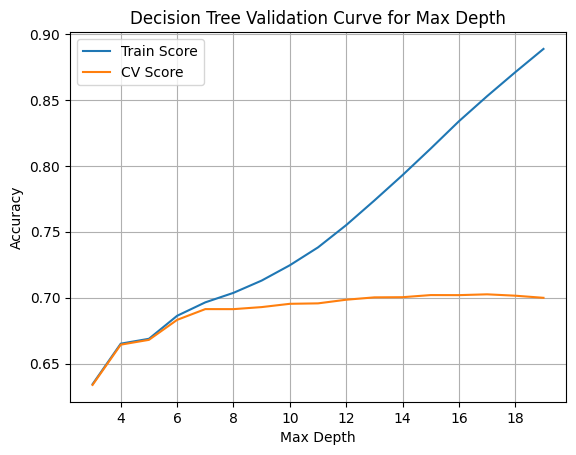

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure()
plt.plot(max_depth_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(max_depth_range, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve for Max Depth")
plt.grid()

plt.savefig('credit_score_decision_tree_max_depth_plot.png')
plt.show()

### Find best criterion

In [31]:
criterion_list = ['gini','entropy', 'log_loss']

In [32]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, max_depth=16)
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=criterion_list, 
                                           param_name='criterion', 
                                           cv=cv_folds,
                                           n_jobs=-1
                                          )

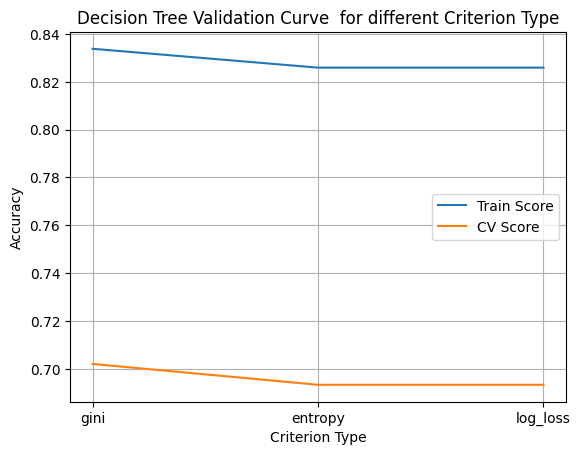

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure()
plt.plot(criterion_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(criterion_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Criterion Type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve  for different Criterion Type")
plt.grid()

plt.savefig('credit_score_decision_tree_criterion_plot.png')
plt.show()

### Find best ccp_alpha for Minimal Cost-Complexity Pruning

In [34]:
ccp_alpha_range = np.linspace(0,0.035, 14+1)

In [35]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, max_depth=16, criterion='gini')
train_scores, cv_scores = validation_curve(decision_tree_model, 
                                           X_train, y_train, 
                                           param_range=ccp_alpha_range, 
                                           param_name='ccp_alpha', 
                                           cv=cv_folds,
                                           n_jobs=-1
                                          )

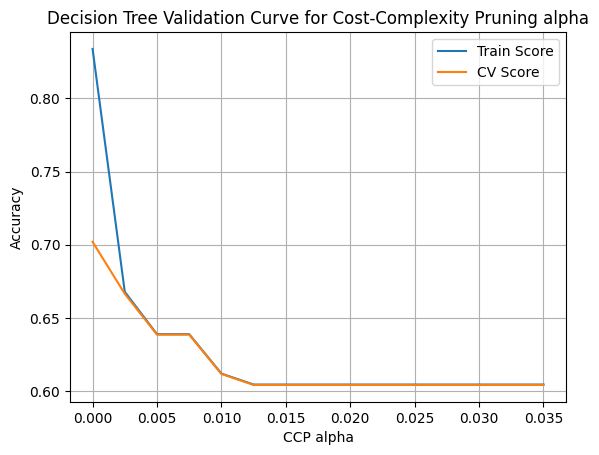

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure()
plt.plot(ccp_alpha_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(ccp_alpha_range, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("CCP alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree Validation Curve for Cost-Complexity Pruning alpha")
plt.grid()
plt.show()
plt.savefig('credit_score_decision_tree_ccp_alpha_plot.png')

### Model with best parameters

In [37]:
decision_tree_model = DecisionTreeClassifier(random_state=random_state, 
                                             max_depth=16, criterion='gini', ccp_alpha=0.0)

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=100)

In [38]:
y_pred = decision_tree_model.predict(X_test)

print(f"Best Decision Tree accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}")

Best Decision Tree accuracy on Test dataset: 71.21499999999999


### Top k features 

[0.21492786 0.1291208  0.07374725 0.05840632 0.05164173 0.04763236
 0.03451065 0.02901529 0.02894207 0.02728292 0.02417377 0.02265391
 0.0215892  0.02082278 0.01774647]


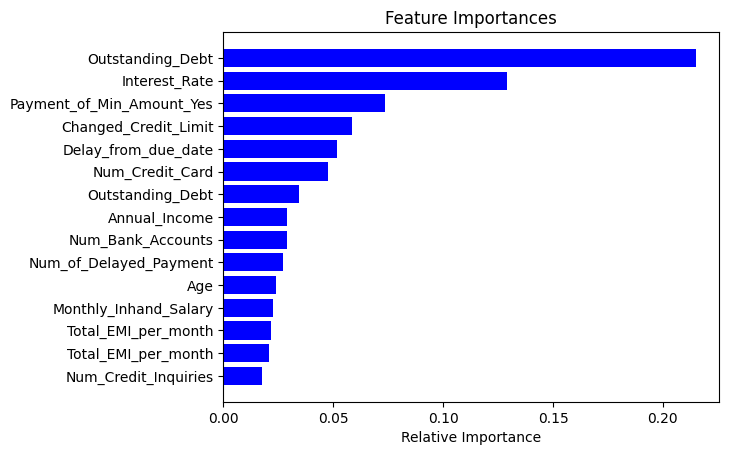

In [39]:
top_k = 15

importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1][:top_k]
print(importances[indices])
features = X_train.columns

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices][::-1], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices[::-1]])
plt.xlabel('Relative Importance')
plt.savefig('credit_score_decision_tree_top_features.png')
plt.show()


In [40]:
# importances = decision_tree_model.feature_importances_
# indices = np.argsort(importances)
# features = X_train.columns

# plt.figure(figsize=(20, 10))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

## 4.2 Neural Network

In [41]:
from sklearn.neural_network import MLPClassifier

### Find best neural numbers 

In [42]:
hidden_layer_sizes_list = [(val, val) for val in range(10, 100, 10)] 

In [43]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True)
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="hidden_layer_sizes", 
                                           param_range=hidden_layer_sizes_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

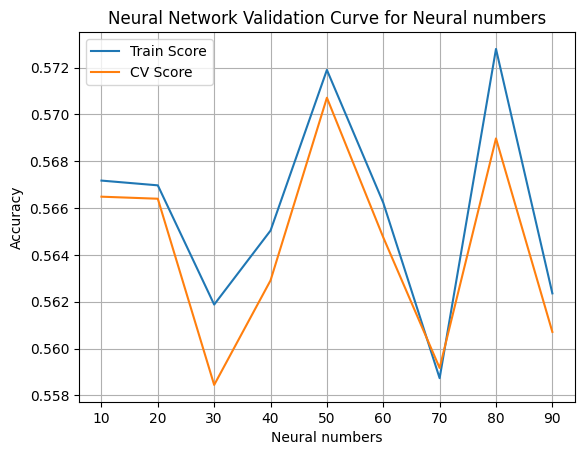

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure()
plt.plot([val[0] for val in hidden_layer_sizes_list], np.mean(train_scores, axis=1), label='Train Score')
plt.plot([val[0] for val in hidden_layer_sizes_list], np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Neural numbers")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for Neural numbers")
plt.grid()

plt.savefig('credit_score_neural_network_neural_numbers_plot.png')
plt.show()

### Find best activation function

In [45]:
activation_list = ['identity', 'logistic', 'tanh', 'relu'] 

In [46]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True, 
                                     hidden_layer_sizes=(50, 50))
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="activation", 
                                           param_range=activation_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

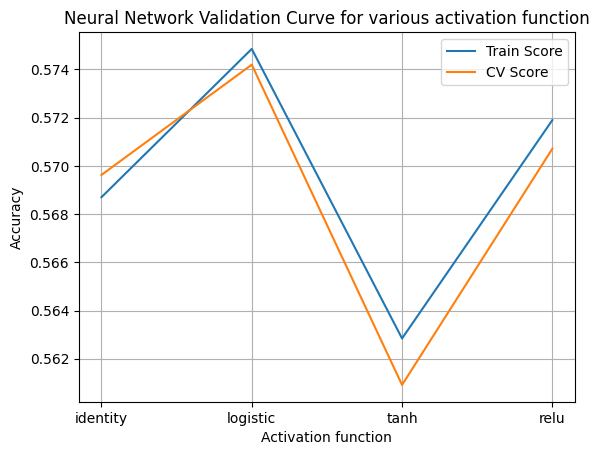

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure()
plt.plot(activation_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(activation_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Activation function")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for various activation function")
plt.grid()

plt.savefig('credit_score_neural_network_activation_function_plot.png')
plt.show()

### Find best solver

In [48]:
solver_list = ['lbfgs', 'sgd', 'adam'] 

In [49]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True,
                                     hidden_layer_sizes=(25, 25),
                                     activation='logistic',
                                    )
train_scores, cv_scores = validation_curve(neural_network_model, 
                                           X_train, y_train, 
                                           param_name="solver", 
                                           param_range=solver_list, 
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

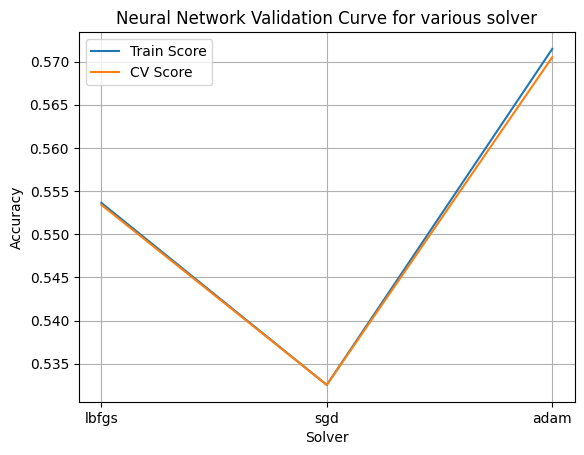

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure()
plt.plot(solver_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(solver_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Solver")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Validation Curve for various solver")
plt.grid()

plt.savefig('credit_score_neural_network_solver_plot.png')
plt.show()

### Model with best parameters

In [51]:
neural_network_model = MLPClassifier(random_state=random_state, early_stopping=True,
                                     hidden_layer_sizes=(50, 50),
                                     activation='logistic',
                                     solver='adam',
                                    )

neural_network_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50, 50), random_state=100)

In [52]:
y_pred = neural_network_model.predict(X_test)

print(f"Best Neural Network accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}%")

Best Neural Network accuracy on Test dataset: 57.599999999999994%


## 4.3 Boosting

In [53]:
from sklearn.ensemble import AdaBoostClassifier

### Find best number of estimators

In [83]:
n_estimators_list = range(20, 200, 10)

In [84]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=16,
                                                                          criterion='gini', 
                                                                          ccp_alpha=0.0,
                                                                          random_state=42))
train_scores, cv_scores = validation_curve(adaboost_model,
                                           X_train, y_train,
                                           param_name="n_estimators",
                                           param_range=n_estimators_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

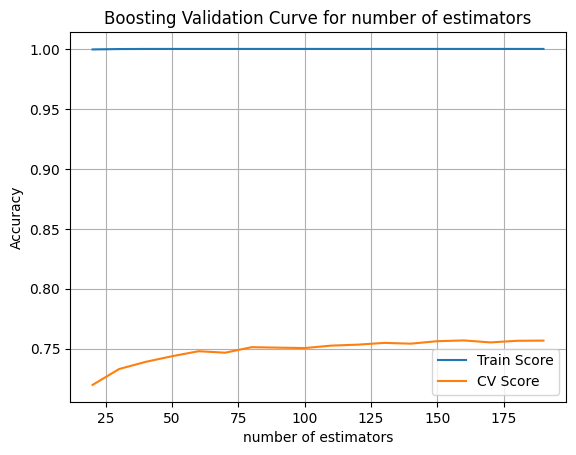

<Figure size 640x480 with 0 Axes>

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = _column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [85]:
plt.figure()
plt.plot(n_estimators_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_estimators_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for number of estimators")
plt.grid()

plt.savefig('credit_score_boosting_no_estimators_plot.png')
plt.show()

### Find best learning rate

In [57]:
learning_rate_list = np.logspace(-4,2,7)

In [58]:
learning_rate_list

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [59]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12, 
                                                                          random_state=42),
                                    n_estimators=90
                                   )
train_scores, cv_scores = validation_curve(adaboost_model,
                                           X_train, y_train,
                                           param_name="learning_rate",
                                           param_range=learning_rate_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d ar

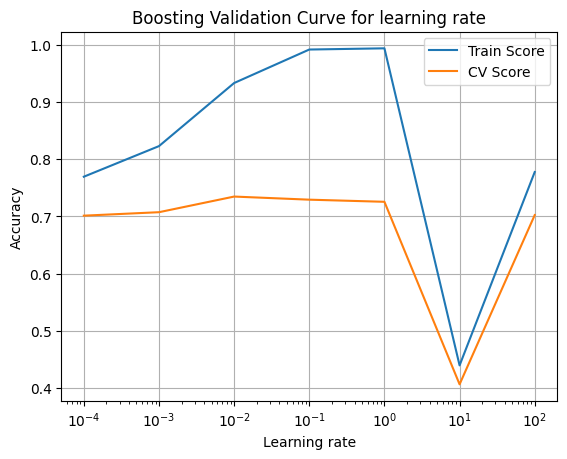

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure()
plt.semilogx(learning_rate_list, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for learning rate")
plt.grid()

plt.savefig('credit_score_boosting_learning_rate_plot.png')
plt.show()

### Best model accuracy

In [86]:
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=16, 
                                                                          random_state=42),
                                    n_estimators=150,
                                    learning_rate=0.1,
                                   )
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=16,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=150)

In [90]:
y_pred = adaboost_model.predict(X_test)
print(f"Best Boost model accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}%")

Best Boost model accuracy on Test dataset: 78.375%


## 4.4 SVM

In [63]:
from sklearn import svm

Due to 100k records runs way too slow on SVM, have to use sampling to reduce training time for parameter selection

In [64]:
sample_df = selected_df.sample(frac=0.1, replace=False, random_state=random_state)
sample_X = selected_df.drop(["Credit_Score", "credit_label"], axis=1)
sample_y = selected_df[["credit_label"]]
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_X, 
                                                                                sample_y, 
                                                                                test_size=test_rate, 
                                                                                random_state=random_state)

### Find best C

In [65]:
C_list = np.logspace(-3,2,6)

In [66]:
svm_model = svm.SVC(random_state=random_state)
train_scores, cv_scores = validation_curve(svm_model,
                                           sample_X_train, sample_y_train,
                                           param_name="C",
                                           param_range=C_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/onedal/datatypes/validation.py:135: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py

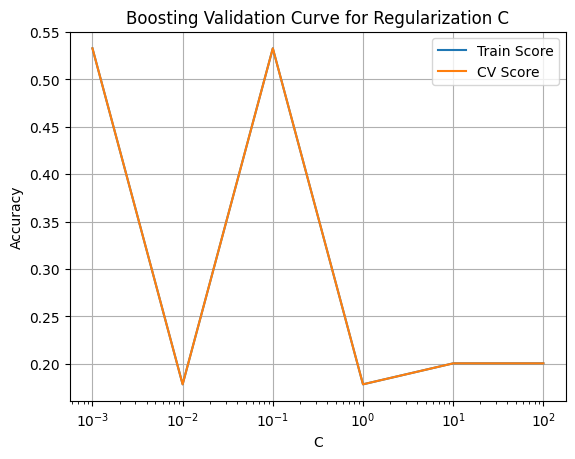

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure()
plt.semilogx(C_list, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(C_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for Regularization C")
plt.grid()

plt.savefig('credit_score_SVM_C_plot.png')
plt.show()

### Find best kernel

In [68]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']

In [69]:
svm_model = svm.SVC(random_state=random_state, C=0.1)
train_scores, cv_scores = validation_curve(svm_model,
                                           sample_X_train, sample_y_train.values.ravel(),
                                           param_name="kernel",
                                           param_range=kernel_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/leon72/anaconda3/envs/CS7641_SL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d ar

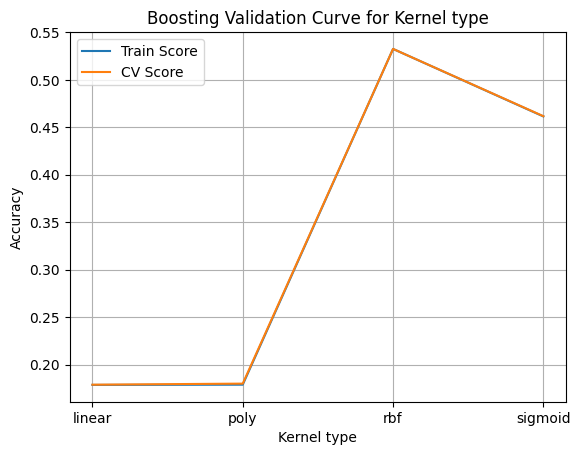

<Figure size 640x480 with 0 Axes>

In [70]:
plt.figure()
plt.plot(kernel_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(kernel_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Kernel type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for Kernel type")
plt.grid()

plt.savefig('credit_score_SVM_kernel_plot.png')
plt.show()

### Best model accuracy

In [91]:
import time 
start_time = time.time()
svm_model = svm.SVC(random_state=random_state, C=0.1, kernel='rbf')
svm_model.fit(X_train, y_train.values.flatten())
print(f"run time: {time.time()-start_time}")

run time: 1.2984158992767334


In [92]:
y_pred = svm_model.predict(X_test)
print(f"Best Boost model accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}%")

Best Boost model accuracy on Test dataset: 52.855%


## 4.5 KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

Due to 1 million records runs way too slow on KNN, have to use sampling to reduce training time for parameter selection

In [74]:
sample_df = selected_df.sample(frac=0.1, replace=False, random_state=random_state)
sample_X = selected_df.drop(["Credit_Score", "credit_label"], axis=1)
sample_y = selected_df[["credit_label"]]
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(sample_X, 
                                                                                sample_y, 
                                                                                test_size=test_rate, 
                                                                                random_state=random_state)

### Find best no of neighbors

In [75]:
n_neighbors_list = range(2, 30, 2)

In [76]:
knn_model = KNeighborsClassifier()
train_scores, cv_scores = validation_curve(knn_model,
                                           sample_X_train, sample_y_train,
                                           param_name="n_neighbors",
                                           param_range=n_neighbors_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

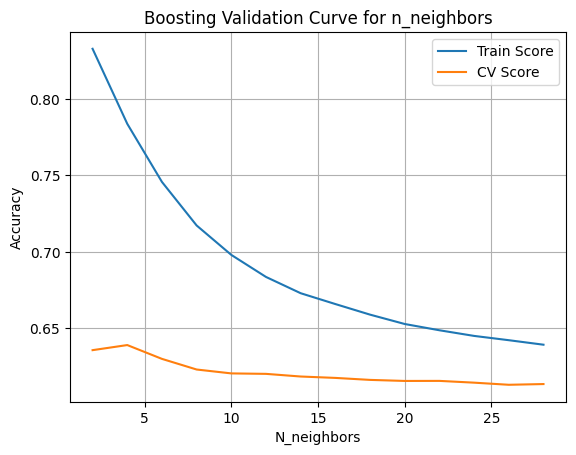

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure()
plt.plot(n_neighbors_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_neighbors_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("N_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for n_neighbors")
plt.grid()

plt.savefig('credit_score_knn_N_neighbors_plot.png')
plt.show()

### Find best algorithm

In [78]:
algorithm_list = ['ball_tree', 'kd_tree', 'brute']

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=4)
train_scores, cv_scores = validation_curve(knn_model,
                                           sample_X_train, sample_y_train,
                                           param_name="algorithm",
                                           param_range=algorithm_list,
                                           cv=cv_folds,
                                           n_jobs=-1,
                                          )

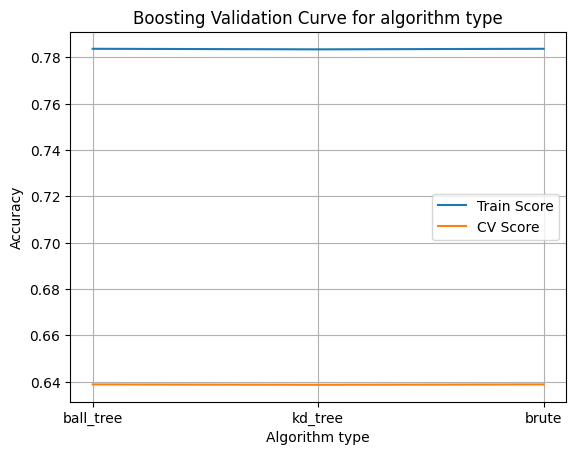

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure()
plt.plot(algorithm_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(algorithm_list, np.mean(cv_scores, axis=1), label='CV Score')
plt.xlabel("Algorithm type")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Boosting Validation Curve for algorithm type")
plt.grid()

plt.savefig('credit_score_knn_algorithm_plot.png')
plt.show()

### Best model accuracy

In [81]:
import time 
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model.fit(X_train, y_train)
print(f"run time: {time.time()-start_time}")

run time: 0.7364063262939453


In [82]:
start_time = time.time()
y_pred = knn_model.predict(X_test)
print(f"Best KNN model accuracy on Test dataset: {100*accuracy_score(y_test, y_pred)}%")
print(f"run time: {time.time()-start_time}")

Best KNN model accuracy on Test dataset: 66.515%
run time: 0.20171070098876953


# 5. Performance comparison